In [364]:
import geopandas as gpd
import pandas as pd 
import numpy as np

In [365]:
DEFAULT_CRS = "EPSG:4326"

In [366]:
setor_censitarios = gpd.read_file('../../data/raw/SC2022_SP/SP_setores_CD2022.gpkg')

In [367]:
domicilio1 = pd.read_csv('../../data/raw/SC2022_SP/Agregados_por_setores_caracteristicas_domicilio1_BR.csv', sep=';')
domicilio2 = pd.read_csv('../../data/raw/SC2022_SP/Agregados_por_setores_caracteristicas_domicilio2_BR.csv', sep=';')
domicilio3 = pd.read_csv('../../data/raw/SC2022_SP/Agregados_por_setores_caracteristicas_domicilio3_BR.csv', sep=';')

/var/folders/kf/12t4yv8j7pg0z8zqbypmj9440000gn/T/ipykernel_3774/3840040126.py:1: DtypeWarning: Columns (1,3,4,5,7,8,9,10,11,13,14,15,16,17,20,21,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,51,52,53,54,56,57,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,77,78,84,87) have mixed types. Specify dtype option on import or set low_memory=False.
  domicilio1 = pd.read_csv('../../data/raw/SC2022_SP/Agregados_por_setores_caracteristicas_domicilio1_BR.csv', sep=';')
/var/folders/kf/12t4yv8j7pg0z8zqbypmj9440000gn/T/ipykernel_3774/3840040126.py:2: DtypeWarning: Columns (4,13,15,16,40,42,43,44,45,47,48,49,50,51,52,53,66,68,70,73,75,76,77,78,79,80,81,83,84,86,88,91,93,102,105,110,113,118,120,121,125,129,131,132,134,136,137,142,143,147,148,149,150,154,155,156,157,159,161,162,163,168,169,170,176,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,214,215,216,217,218,219,227,235,238,240,241,242,243,245,248,249,251,259,261,272,273,274,276,277,279,280,281,284,286,287,288,289,290,

In [368]:
setor_censitarios.head()

,CD_SETOR,SITUACAO,CD_SIT,CD_TIPO,AREA_KM2,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,CD_MUN,...,CD_CONCURB,NM_CONCURB,v0001,v0002,v0003,v0004,v0005,v0006,v0007,geometry
0,350010505000001,Urbana,1,0,0.123824,3,Sudeste,35,São Paulo,3500105,...,.,None,288,199,199,0,2.1,0.1667,138,"POLYGON ((-51.07255 -21.68865, -51.07237 -21.6..."
1,350010505000002,Urbana,1,0,0.202614,3,Sudeste,35,São Paulo,3500105,...,.,None,674,339,339,0,2.4,0.0143,280,"POLYGON ((-51.07378 -21.68620, -51.07388 -21.6..."
2,350010505000003,Urbana,1,0,0.235048,3,Sudeste,35,São Paulo,3500105,...,.,None,380,269,268,1,1.9,0.0404,198,"POLYGON ((-51.07138 -21.68313, -51.06965 -21.6..."
3,350010505000004,Urbana,1,0,0.288468,3,Sudeste,35,São Paulo,3500105,...,.,None,570,290,288,2,2.4,0.0127,236,"POLYGON ((-51.06880 -21.68808, -51.06730 -21.6..."
4,350010505000005,Urbana,1,0,0.213724,3,Sudeste,35,São Paulo,3500105,...,.,None,612,313,312,1,2.2,0.0404,272,"POLYGON ((-51.06969 -21.69442, -51.06928 -21.6..."


In [369]:
# Ensure both columns are of the same type (e.g., int64)
setor_censitarios['CD_SETOR'] = setor_censitarios['CD_SETOR'].astype(int)
domicilio1['CD_setor'] = domicilio1['CD_setor'].astype(int)
domicilio2['CD_setor'] = domicilio2['CD_setor'].astype(int)
domicilio3['CD_setor'] = domicilio3['CD_setor'].astype(int)

# join setor censitario com agregados de caracteristicas do domicilio by CD_setor
setor_censitarios = setor_censitarios.join(domicilio1.set_index('CD_setor'), on='CD_SETOR', how='left')
setor_censitarios = setor_censitarios.join(domicilio2.set_index('CD_setor'), on='CD_SETOR', how='left')
setor_censitarios = setor_censitarios.join(domicilio3.set_index('CD_setor'), on='CD_SETOR', how='left')

setor_censitarios.head()

,CD_SETOR,SITUACAO,CD_SIT,CD_TIPO,AREA_KM2,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,CD_MUN,...,V00634,V00635,V00636,V00637,V00638,V00639,V00640,V00641,V00642,V00643
0,350010505000001,Urbana,1,0,0.123824,3,Sudeste,35,São Paulo,3500105,...,0,0,0,0,0,0,0,0,0,0
1,350010505000002,Urbana,1,0,0.202614,3,Sudeste,35,São Paulo,3500105,...,0,0,0,0,0,0,0,0,0,0
2,350010505000003,Urbana,1,0,0.235048,3,Sudeste,35,São Paulo,3500105,...,0,0,0,0,0,0,0,0,0,0
3,350010505000004,Urbana,1,0,0.288468,3,Sudeste,35,São Paulo,3500105,...,0,0,0,0,0,0,0,0,0,0
4,350010505000005,Urbana,1,0,0.213724,3,Sudeste,35,São Paulo,3500105,...,0,0,0,0,0,0,0,0,0,0


In [370]:
setor_censitarios.fillna(0, inplace=True)
#replace x with 0
setor_censitarios.replace('X', 0, inplace=True)

/var/folders/kf/12t4yv8j7pg0z8zqbypmj9440000gn/T/ipykernel_3774/1686872391.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  setor_censitarios.fillna(0, inplace=True)


In [371]:
print(setor_censitarios.columns)

Index(['CD_SETOR', 'SITUACAO', 'CD_SIT', 'CD_TIPO', 'AREA_KM2', 'CD_REGIAO',
       'NM_REGIAO', 'CD_UF', 'NM_UF', 'CD_MUN',
       ...
       'V00634', 'V00635', 'V00636', 'V00637', 'V00638', 'V00639', 'V00640',
       'V00641', 'V00642', 'V00643'],
      dtype='object', length=680)


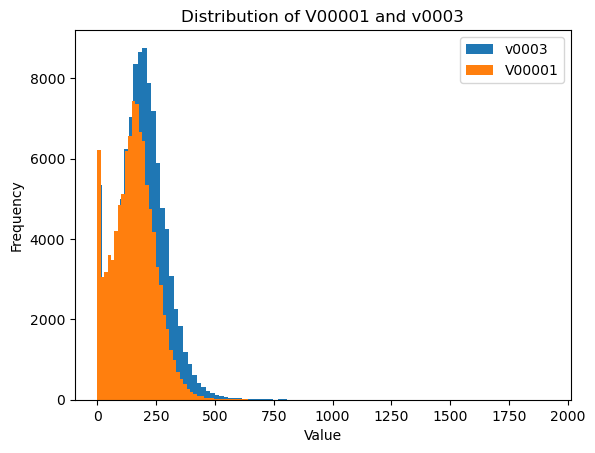

In [372]:
import matplotlib.pyplot as plt

# plot the distribution of V00001 and v0003, before convert to int
setor_censitarios['V00001'] = setor_censitarios['V00001'].astype(int)
setor_censitarios['v0003'] = setor_censitarios['v0003'].astype(int)

setor_censitarios['v0003'].plot.hist(bins=100, label='v0003')
setor_censitarios['V00001'].plot.hist(bins=100, label='V00001')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of V00001 and v0003')
plt.show()


In [373]:
# filter sp
setor_censitarios = setor_censitarios[(setor_censitarios['NM_MUN'] == 'São Paulo')]

setor_censitarios['percentual_domicilios_agua_rede_geral'] = setor_censitarios['V00111'].astype(int)
setor_censitarios['percentual_domicilios_esgoto_rede_geral'] = setor_censitarios['V00309'].astype(int)
setor_censitarios['percentual_domicilios_lixo_coletado'] = setor_censitarios['V00397'].astype(int) + setor_censitarios['V00398'].astype(int)
setor_censitarios['V00001'] = setor_censitarios['V00001'].astype(int)


setor_censitarios_ = gpd.GeoDataFrame(setor_censitarios[['CD_SETOR', 'percentual_domicilios_agua_rede_geral', 'percentual_domicilios_esgoto_rede_geral', 'percentual_domicilios_lixo_coletado', 'V00001', 'SITUACAO', 'geometry']])

/opt/anaconda3/envs/scriptsMestrado/lib/python3.12/site-packages/geopandas/geodataframe.py:1528: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/opt/anaconda3/envs/scriptsMestrado/lib/python3.12/site-packages/geopandas/geodataframe.py:1528: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/opt/anaconda3/envs/scriptsMestrado/lib/python3.12/site-packages/geopandas/geodataframe.py:1528: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of call

# Applying Dasymetric Mapping
- Apply a dasymetric mapping using regions doesn't have CNEFE data

In [374]:
cnefe_hex = gpd.read_file("../../data/hex_agg_cnef_sp.gpkg")

In [375]:
if setor_censitarios_.crs != DEFAULT_CRS:
    setor_censitarios_ = setor_censitarios_.to_crs(DEFAULT_CRS)
if cnefe_hex.crs != DEFAULT_CRS:
    cnefe_hex = cnefe_hex.to_crs(DEFAULT_CRS)

In [376]:
filter_cnefe = ((cnefe_hex['esp_1'] == 0) | (cnefe_hex['esp_1'].isnull()))

In [377]:
setor_censitarios_dm = setor_censitarios_.overlay(cnefe_hex[filter_cnefe], how='difference')

/opt/anaconda3/envs/scriptsMestrado/lib/python3.12/site-packages/geopandas/geodataframe.py:2475: UserWarning: `keep_geom_type=True` in overlay resulted in 1141 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


In [378]:
print(setor_censitarios_dm.size)
print(setor_censitarios_.size)


191023
191107


<Axes: >

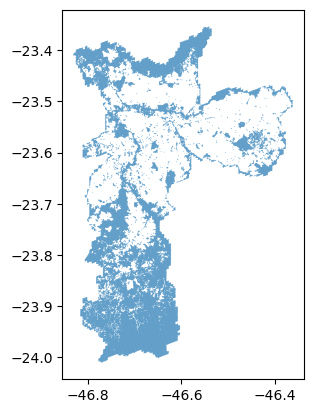

In [379]:
cnefe_hex[filter_cnefe].plot()

<Axes: >

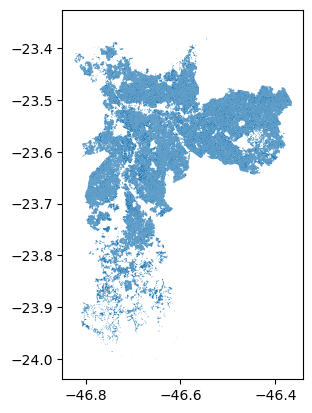

In [380]:
setor_censitarios_dm.plot()

# Calculo das variavies

In [381]:

setor_censitarios_dm["area_poly"] = (
    setor_censitarios_dm
    .geometry
    .to_crs("EPSG:5641")
    .area).astype(int) # Area may be invalid for a geographic CRS using degrees as units; use GeoSeries.to_crs() to project geometries to a planar CRS before using this function.


In [382]:
def calculate_var_density(gpd, var, area):
    return gpd[var]/gpd[area]

In [383]:
setor_censitarios_dm["domicilios_agua_rede_geral_p"] = calculate_var_density(setor_censitarios_dm, 'percentual_domicilios_agua_rede_geral', 'area_poly')
setor_censitarios_dm["domicilios_esgoto_rede_geral_p"] = calculate_var_density(setor_censitarios_dm, 'percentual_domicilios_esgoto_rede_geral', 'area_poly')
setor_censitarios_dm["domicilios_lixo_coletado_p"] = calculate_var_density(setor_censitarios_dm, 'percentual_domicilios_lixo_coletado', 'area_poly')
setor_censitarios_dm["domicilios_p"] = calculate_var_density(setor_censitarios_dm, 'V00001', 'area_poly')





In [384]:
setor_censitarios_dm.head()

,CD_SETOR,percentual_domicilios_agua_rede_geral,percentual_domicilios_esgoto_rede_geral,percentual_domicilios_lixo_coletado,V00001,SITUACAO,geometry,area_poly,domicilios_agua_rede_geral_p,domicilios_esgoto_rede_geral_p,domicilios_lixo_coletado_p,domicilios_p
0,355030801000001,289,289,289,289,Urbana,"POLYGON ((-46.56954 -23.56918, -46.57016 -23.5...",85264,0.003389,0.003389,0.003389,0.003389
1,355030801000002,599,599,599,599,Urbana,"POLYGON ((-46.56806 -23.56521, -46.56786 -23.5...",85387,0.007015,0.007015,0.007015,0.007015
2,355030801000003,205,205,205,205,Urbana,"POLYGON ((-46.56619 -23.56605, -46.56632 -23.5...",66126,0.003100,0.003100,0.003100,0.003100
3,355030801000004,221,221,221,221,Urbana,"POLYGON ((-46.56876 -23.56856, -46.56863 -23.5...",77082,0.002867,0.002867,0.002867,0.002867
4,355030801000005,221,221,221,221,Urbana,"POLYGON ((-46.57121 -23.57005, -46.57056 -23.5...",103113,0.002143,0.002143,0.002143,0.002143


# Lendo H3 

In [385]:
hex_sp = gpd.read_file("../../data/shapeFiles/GRIDS_H3_SP_RES10") 

In [386]:
if setor_censitarios_dm.crs != DEFAULT_CRS:
    setor_censitarios_dm = setor_censitarios_dm.to_crs(DEFAULT_CRS)
if hex_sp.crs != DEFAULT_CRS:
    hex_sp = hex_sp.to_crs(DEFAULT_CRS)

In [387]:
setor_censitarios_join_h3 =  setor_censitarios_dm.overlay(hex_sp[['id_hex', 'geometry']], how='intersection')


/opt/anaconda3/envs/scriptsMestrado/lib/python3.12/site-packages/geopandas/geodataframe.py:1816: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  merged_geom = block.unary_union
/opt/anaconda3/envs/scriptsMestrado/lib/python3.12/site-packages/geopandas/geodataframe.py:2475: UserWarning: `keep_geom_type=True` in overlay resulted in 22437 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


In [388]:
setor_censitarios_join_h3["area_poly"] = (
    setor_censitarios_join_h3
    .geometry
    .to_crs("EPSG:5641")
    .area).astype(int) # Area may be invalid for a geographic CRS using degrees as units; use GeoSeries.to_crs() to project geometries to a planar CRS before using this function.





In [389]:
setor_censitarios_join_h3["domicilios_agua_rede_geral_n"] = np.ceil(setor_censitarios_join_h3["area_poly"] * setor_censitarios_join_h3["domicilios_agua_rede_geral_p"].astype(float))
setor_censitarios_join_h3["domicilios_esgoto_rede_geral_n"] = np.ceil(setor_censitarios_join_h3["area_poly"] * setor_censitarios_join_h3["domicilios_esgoto_rede_geral_p"].astype(float))
setor_censitarios_join_h3["domicilios_lixo_coletado_n"] = np.ceil(setor_censitarios_join_h3["area_poly"] * setor_censitarios_join_h3["domicilios_lixo_coletado_p"].astype(float))
setor_censitarios_join_h3["domicilios_n"] = np.ceil(setor_censitarios_join_h3["area_poly"] * setor_censitarios_join_h3["domicilios_p"].astype(float))



In [390]:
# Precompute the sums for URBANO and RURAL areas
urbano_area_sum = setor_censitarios_join_h3[setor_censitarios_join_h3['SITUACAO'] == 'Urbana'].groupby('id_hex')['area_poly'].sum().reset_index()
rural_area_sum = setor_censitarios_join_h3[setor_censitarios_join_h3['SITUACAO'] == 'Rural'].groupby('id_hex')['area_poly'].sum().reset_index()

# Rename columns for clarity
urbano_area_sum.columns = ['id_hex', 'area_poly_urbano_sum']
rural_area_sum.columns = ['id_hex', 'area_poly_rural_sum']

# Perform the main aggregation
agg_variables_by_hex = setor_censitarios_join_h3.groupby('id_hex').agg({
    "domicilios_agua_rede_geral_n": 'sum',
    "domicilios_esgoto_rede_geral_n": 'sum',
    "domicilios_lixo_coletado_n": 'sum',
    "domicilios_n": 'sum',
}).reset_index()

# Merge the precomputed sums back into the main DataFrame
agg_variables_by_hex = agg_variables_by_hex.merge(urbano_area_sum, on='id_hex', how='left')
agg_variables_by_hex = agg_variables_by_hex.merge(rural_area_sum, on='id_hex', how='left')

# Fill NaN values with 0 (in case there are hexes with no URBANO or RURAL areas)
agg_variables_by_hex['area_poly_urbano_sum'] = agg_variables_by_hex['area_poly_urbano_sum'].fillna(0)
agg_variables_by_hex['area_poly_rural_sum'] = agg_variables_by_hex['area_poly_rural_sum'].fillna(0)

# Rename the columns for clarity
agg_variables_by_hex.columns = [
        'id_hex',
        'domicilios_agua_rede_geral_n_sum',
        'domicilios_esgoto_rede_geral_n_sum',
        'domicilios_lixo_coletado_n_sum', 
        'domicilios_n_sum',
        'area_poly_urbano_sum',
        'area_poly_rural_sum']

In [391]:
agg_variables_by_hex

,id_hex,domicilios_agua_rede_geral_n_sum,domicilios_esgoto_rede_geral_n_sum,domicilios_lixo_coletado_n_sum,domicilios_n_sum,area_poly_urbano_sum,area_poly_rural_sum
0,8aa810000007fff,32.0,30.0,32.0,32.0,17993.0,0.0
1,8aa81000000ffff,20.0,19.0,20.0,20.0,17993.0,0.0
2,8aa810000017fff,23.0,21.0,23.0,23.0,17992.0,0.0
3,8aa81000001ffff,34.0,33.0,35.0,35.0,17992.0,0.0
4,8aa810000027fff,35.0,34.0,35.0,35.0,17993.0,0.0
...,...,...,...,...,...,...,...
59851,8aa8108f46a7fff,0.0,0.0,0.0,0.0,0.0,17971.0
59852,8aa8108f4ba7fff,0.0,0.0,0.0,0.0,0.0,0.0
59853,8aa8108f5c8ffff,0.0,0.0,0.0,0.0,0.0,0.0
59854,8aa8108f5ca7fff,0.0,0.0,0.0,0.0,0.0,0.0


In [392]:
filtered_agg_variables_by_hex = agg_variables_by_hex[agg_variables_by_hex['area_poly_urbano_sum'] > agg_variables_by_hex['area_poly_rural_sum']]
filtered_agg_variables_by_hex.head()

,id_hex,domicilios_agua_rede_geral_n_sum,domicilios_esgoto_rede_geral_n_sum,domicilios_lixo_coletado_n_sum,domicilios_n_sum,area_poly_urbano_sum,area_poly_rural_sum
0,8aa810000007fff,32.0,30.0,32.0,32.0,17993.0,0.0
1,8aa81000000ffff,20.0,19.0,20.0,20.0,17993.0,0.0
2,8aa810000017fff,23.0,21.0,23.0,23.0,17992.0,0.0
3,8aa81000001ffff,34.0,33.0,35.0,35.0,17992.0,0.0
4,8aa810000027fff,35.0,34.0,35.0,35.0,17993.0,0.0


In [393]:
hex_censo_final = hex_sp.join(filtered_agg_variables_by_hex.set_index('id_hex'), how='inner', on='id_hex')

<Axes: >

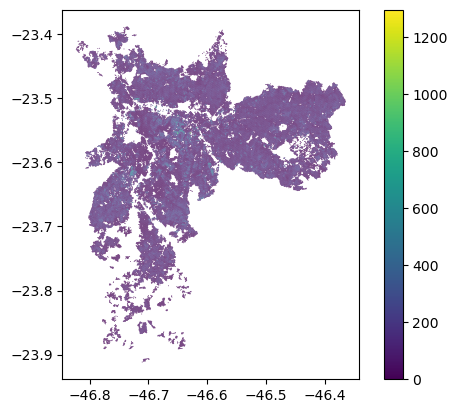

In [394]:
# plot a cloroopleth map of domicilios_n_sum
hex_censo_final.plot(column='domicilios_n_sum', legend=True)   


In [395]:
hex_censo_final["Households connected to water supply network (%)"] = hex_censo_final["domicilios_agua_rede_geral_n_sum"]/hex_censo_final["domicilios_n_sum"]
hex_censo_final["Households connected to sewerage system (%)"] = hex_censo_final["domicilios_esgoto_rede_geral_n_sum"]/hex_censo_final["domicilios_n_sum"]
hex_censo_final["Households solid waste collection (%)"] = hex_censo_final["domicilios_lixo_coletado_n_sum"]/hex_censo_final["domicilios_n_sum"]


In [397]:
hex_censo_final.to_file("../../data/generated/WGS84_hex_censo_2022.gpkg", driver="GPKG")